In [1]:
from __future__ import print_function
import requests
import json
import re #正则匹配
import time #时间处理模块
import jieba #中文分词
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from PIL import Image
from wordcloud import WordCloud  #绘制词云模块
from snownlp import SnowNLP

# import paddlehub as hub

In [2]:
def getMovieinfo(url):
    '''
    请求爱奇艺评论接口，返回response信息
    参数  url: 评论的url
    return: response信息
    '''
    session = requests.Session()
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.113 Safari/537.36",

    }
    response = session.get(url, headers=headers)
    if response.status_code == 200:
         return response.text
    return None

In [3]:
# 解析jgon数露，获取评论
def saveMoviernforoFile(lastId,arr,url):

    # '''
    # 解析json数据，获取评论
    # 爬取爱奇艺评论区
    # #参数lastrd：最后一条评论ID arx：存故文本的1ist
    # ：return：新的lastrd
    # '''
    if url == None:
        url="https://sns-comment.iqiyi.com/v3/comment/get_comments.action?agent_type=118&agent_version=9.11.5&authcookie=null&business_type=17&content_id=15472234400&hot_size=0&page=&page_size=20&types=time&last_id="

    url+=str(lastId)
    responseTxt=getMovieinfo(url)
    responseJson=json.loads(responseTxt)
    comments=responseJson['data']['comments']
    for val in comments:
        #print(val.keys())
        if'content'in val.keys():
            print(val['content'])
            arr.append(val['content'])
            lastId=str(val['id'])
    return lastId

In [4]:
#解析jgon数露，获取评论
def saveMoviernforoFileBili(lastId,arr,url):

    # '''
    # 爬取bilibili评论区
    # 解析json数据，获取评论
    # #参数lastrd：最后一条评论ID arx：存故文本的1ist
    # ：return：新的lastrd
    # 752881391回形针
    # 582921863
    # '''
    if url == None:
#            https://api.bilibili.com/x/v2/reply?callback=jQuery17202015349816394958_1600946223676&type=1&oid=39807126&sort=2&_=1600946808897&pn=
        url="https://api.bilibili.com/x/v2/reply?callback=jQuery17202354826870397837_1588331328657&type=1&oid=752881391&sort=2&_=1588331336930&pn="
    url+=str(lastId)
    responseTxt=getMovieinfo(url)
    responseJson=json.loads(responseTxt)
    comments=responseJson['data']['replies']
    for val in comments:
        #print(val.keys())
        if'content'in val.keys():
            print(val['content']['message'])
            arr.append(val['content']['message'])
    return lastId

In [5]:
def clear_special_char(content):

    #清除没有意义的字符，数据清洗

    s = re.sub(r"</?(.+?)>|&nbsp;|\t|\r", "", content)
    s = re.sub(r"\n", "", s)
    s = re.sub(r"\*", "\\*", s)
    s = re.sub("\u4e00-\u9fa5^a-z^A-Z^0-9", "", s)
    s = re.sub(
        '[\001\002\003\004\005\006\007\x08\x09\x0a\x0b\x0c\x0d\x0e\x0f\x10\x11\x12\x13\x14\x15\x16\x17\x18\x19\x1a]+',
        '', s)
    s = re.sub('[a-zA-Z]', "", s)
    s = re.sub('^\d+(\.\d+)?$', "", s)
    s = re.sub(u'[\U00010000-\U0010ffff]', ' ', s)
    s = re.sub(u'[\uD800-\uDBFF][\uDC00-\uDFFF]', ' ', s)
    for ch in '，。；：“”、》《、|*&…🙏！♥♡😊🌚？💚√🍼【】💔🐴]๑👍[🌟😘🤘ﾉ🐱👩‍❤“💎🌸💙😁❄，≧▽≦👀🐶🍬😂 !🧡😃 ヾ↗~↖＾ 🏻🍋～♀٩௰^ و˃͈ ̶ω˂😆௰ ˂🔒🧍💛💚💖Ő ∀Ő∀✔🤠( ง _ • 。́ ) ง🔒✨🍑💙💜👧🐛🐟✊🌠🌨💪⭐”…':
        s = s.replace(ch, ' ')
    return s

In [6]:
def fenci(text):
    '''
    利用jieba进行分词
    参数 text:需要分词的句子或文本
    return：分词结果
    '''
    jieba.load_userdict('bilibili.txt')
    seg = jieba.lcut(text,cut_all = False)
    print(seg)
    return seg

In [7]:
def stopwordslist(file_path):
    '''
    创建停用词表
    参数 file_path:停用词文本路径
    return：停用词list
    '''
    stopwords = [line.strip() for line in open(file_path,encoding='UTF-8').readlines()]


    return stopwords

In [8]:
def movestopwords(sentence,stopwords,counts):
    '''
    去除停用词,统计词频
    参数 file_path:停用词文本路径 stopwords:停用词list counts: 词频统计结果
    return：None
    '''
    out = []
    for word in sentence:
        if word not in stopwords:
            if len(word)!=1:
                counts[word] = counts.get(word,0)+1

    return None

In [9]:
def drawcounts(counts,num):
    '''
    根据词频绘制统计表

    return：none
    '''
    x_aixs = []
    y_aixs = []
    c_order = sorted(counts.items(),key = lambda x:x[1],reverse = True) # 对二维数据进行排序
    # print(x_crder)
    for c in c_order[:num]:
        x_aixs.append(c[0])
        y_aixs.append(c[1])

    matplotlib.rcParams['font.sans-serif'] = ['SimHei'] #指定默认字体
    matplotlib.rcParams['axes.unicode_minus'] = False
    plt.bar(x_aixs,y_aixs)
    plt.title('词频统计结果')
    plt.show()

In [10]:
def drawcloud(word_f):
#     '''
#     根据词频绘制词云图
#     参数 word_f:统计出的词频结果
#     return：none
#     '''

    #背景图片
    # coud_mask = np.array(Image.open(''))
    #忽略显示的词
    st = set(["东西","这是","真的"])
    #生成
    wc = WordCloud(background_color='white',
                   mask=None,
                   max_words=150,
                   font_path='simhei.ttf',
                   min_font_size=10,
                   max_font_size=100,
                   width=400,
                   relative_scaling=0.3,
                   stopwords=st
                   )
    wc.fit_words(word_f)
    wc.to_file('pic.png')

In [11]:
def crawler(num,choose,url):
    lastId = '0'
    arr = [] # 评论的存放数组
    if choose=="aqy":
        with open('aqy.txt','a',encoding='utf-8') as f:
            for i in range(num):
                lastId = saveMoviernforoFile(lastId,arr,url)
                time.sleep(0.5)
            for item in arr:
                item = clear_special_char(item)  # 清楚特殊字符
                if item.strip()!='':
                    try:
                        f.write(item+'\n')
                    except Exception as e:
                        print("含有特殊字符")
    elif choose=="bilibili":
        with open('bilibili.txt','a',encoding='utf-8') as f:
            for i in range(num):
                lastId = saveMoviernforoFileBili(i+1,arr,url)
                time.sleep(0.5)
            for item in arr:
                item = clear_special_char(item)  # 清楚特殊字符
                if item.strip()!='':
                    try:
                        f.write(item+'\n')
                    except Exception as e:
                        print("含有特殊字符")
    else:
        print("没有此选项")


    print('一共爬取：',len(arr))

In [12]:
def analys(counts,choose):
    if choose =="aqy":
        f = open('aqy.txt', 'r', encoding='utf-8')
        for line in f:
            words = fenci(line)
            stopwords = stopwordslist('add_words.txt')
            movestopwords(words, stopwords, counts)
        f.close()
        np.save('my_file.npy', counts)
    if choose =="bili":
        f = open('bilibili.txt', 'r', encoding='utf-8')
        print(f)
        print('*****')
        for line in f:
            #print(line)
            #print('*****')
            words=fenci(line)
            file_path='/Users/wuxilei/Desktop/B--master/add_word.txt'
            stopwords = stopwordslist(file_path)
            movestopwords(words, stopwords, counts)
        f.close()
        np.save('my_file_bili.npy', counts)



In [13]:
# if __name__ == "__main__":

In [15]:
num=1
counts = {}
url='https://api.bilibili.com/x/v2/reply?callback=jQuery17202015349816394958_1600946223676&type=1&oid=39807126&sort=2&_=1600946808897&pn='
# url='https://api.bilibili.com/x/v2/reply?callback=jQuery17202015349816394958_1600946223676&type=1&oid=39807126&sort=2&_=1600946808897&pn='
crawler(num,"bilibili",url)
analys(counts,"bili") # 词频统计输入txt输出分词npy
read_dictionary = np.load('my_file_bili.npy',allow_pickle=True).item() 

狐妖不应该是梦回还嘛
镇魂街每次主角觉醒都会用的一个bgm:真正的王，用中国乐器，还穿插了戏腔，真的真的非常燃，网易云就有，建议感兴趣的可以去听听，一首不容错过的纯音乐（希望大家能给我些赞，让更多支持国漫bgm的人看到，感谢）
刺客伍六七第二季今年6月播出喔
南征北战真的很适合唱热血动画的主题曲了。
国漫神曲很多的啊，比如星游记，三国演义金木水火土，神兵小将，憨八龟，虹猫蓝兔七侠传，精灵世纪等
国漫那就不得不提别看我只是一只羊
看封面盲猜《剪刀刺客》
叶神呜呜呜，刚刚看完小说，真的超燃！
唐僧师徒路过女儿国，守卫说只给女人放行，三位徒弟立马施展法术化作女子，守卫放行了，孙悟空说：师父咋办？只见唐僧在守卫耳边说了几句话守卫就放行了，之后孙悟空问唐僧说了啥，唐僧：我喜欢唱，跳，rap,篮球
雷锋的故事主题曲呢(=・ω・=)
我凹凸不服
其实超兽武装的不错
封面https://i2.hdslb.com/bfs/archive/238924f085fd79aae11dc41ad5cd268466d67b1a.jpg
虽然都是狐妖的歌但是弹幕刷梦回环的我也觉得ky了，up主就是比较喜欢这首歌用了这首歌不可以吗？况且爱youready爱我ready也很好听啊！你不喜欢不代表其他人不喜欢，我就最喜欢这首了啊( ´_ゝ｀)
虹猫蓝兔七侠传不服，精灵世纪片尾曲霞光也不服
看
   我
       一
           手
       蛇
    形
评
    论                 皮  发
       秀          头          麻
          的   你
最后居然有三国的《梦在燃烧》啊啊啊啊我哭辽QAQ
丞相啊！！
凭你也敢踏进我夜王府233333
国产神曲是有但是没有日漫多，主要是国产动漫还不是很完善
一共爬取： 19
<_io.TextIOWrapper name='bilibili.txt' mode='r' encoding='utf-8'>
*****
['狐妖不应该是梦回还嘛', '\n']
['镇魂', '街', '每次', '主角', '觉醒', '都', '会', '用', '的', '一个', ':', '真正', '的', '王', ' ', '用', '中国', '乐器', ' ', '还', '穿插', '

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/Users/wuxilei/anaconda3/envs/tensorflow/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 35789 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/wuxilei/anaconda3/envs/tensorflow/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 39057 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/wuxilei/anaconda3/envs/tensorflow/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 32479 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/wuxilei/anaconda3/envs/tensorflow/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 35745 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/wuxilei/anaconda3/envs/tensorflow/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWar

/Users/wuxilei/anaconda3/envs/tensorflow/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 21916 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/wuxilei/anaconda3/envs/tensorflow/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 27426 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/wuxilei/anaconda3/envs/tensorflow/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 21776 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/wuxilei/anaconda3/envs/tensorflow/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20711 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/wuxilei/anaconda3/envs/tensorflow/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 23432 missing from current font.
  font.set_text(s, 0, flags=flags)
/User

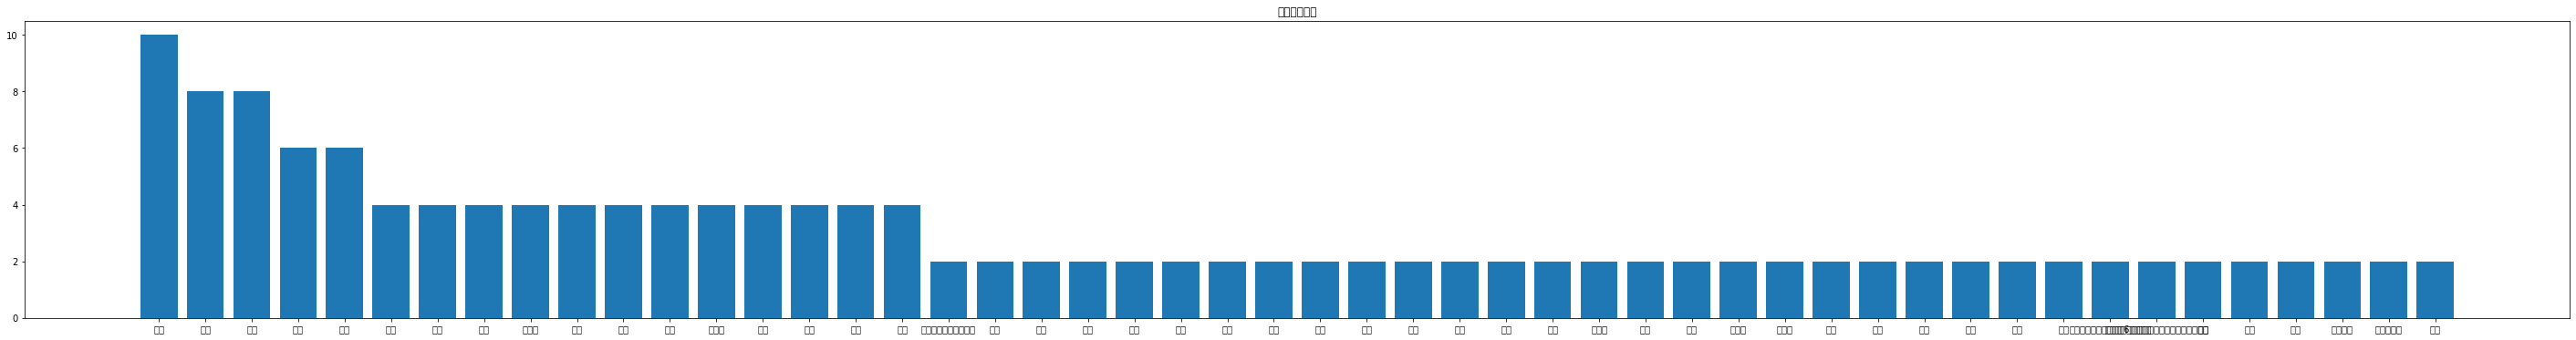

In [16]:
read_dictionary = np.load('my_file_bili.npy',allow_pickle=True).item() 
plt.figure(figsize=(50, 6))
drawcounts(read_dictionary,50)
# drawcloud(read_dictionary)
drawcloud(read_dictionary)


In [17]:
# # drawcloud(read_dictionary)

# # 根据词频绘制词云图
# #     参数 word_f:统计出的词频结果
# #     return：none


# #背景图片
#     # coud_mask = np.array(Image.open(''))
#     #忽略显示的词
# word_f=read_dictionary
# st = set(["东西","这是","真的"])
#     #生成
# wc = WordCloud(background_color='white',
#                mask=None,
#                max_words=150,
#                font_path='simhei.ttf',
#                min_font_size=10,
#                max_font_size=100,
#                width=400,
#                relative_scaling=0.3,
#                stopwords=st
#               )
# # print(type(word_f))
# # print(sizeof(word_f))
# # print(word_f)
# # print(wc)
# wc.fit_words(word_f)
# # from wordcloud import WordCloud  #绘制词云模块
# wc.to_file('pic.png')




In [ ]:


# ---------------情感分析模块---------------------
# 判断句子的情感是积极还是消极的，准确率非常差不建议使用。

    # f = open('bilibili.txt', 'r', encoding='utf-8')
    # positive = 0
    # negative = 0
    # for line in f:
    #     a = SnowNLP(line).sentiments
    #     print(line+" "+str(a))
    #     if a >0.6:
    #         positive=positive+1
    #     if a <0.4:
    #         negative=negative+1
    #
    # print(positive)
    # print(negative)

# -----------------------------------------------------


    # 爱奇艺模块
    # f = open('aqy.txt','r',encoding='utf-8')
    # for line in f:
    #     words = fenci(line)
    #     stopwords = stopwordslist('add_words.txt')
    #     movestopwords(words,stopwords,counts)
    #
    # drawcounts(read_dictionary,10)
    # drawcloud(read_dictionary)
    # f.close()

In [ ]:
# # 导入扩展库
# import re # 正则表达式库
# import collections # 词频统计库
# import numpy as np # numpy数据处理库
# import jieba # 结巴分词
# import wordcloud # 词云展示库
# from PIL import Image # 图像处理库
# import matplotlib.pyplot as plt # 图像展示库

# # 读取文件
# fn = open('bilibili.txt') # 打开文件
# string_data = fn.read() # 读出整个文件
# fn.close() # 关闭文件

# # 文本预处理
# pattern = re.compile(u'\t|\n|\.|-|:|;|\)|\(|\?|"') # 定义正则表达式匹配模式
# string_data = re.sub(pattern, '', string_data) # 将符合模式的字符去除

# # 文本分词
# seg_list_exact = jieba.cut(string_data, cut_all = False) # 精确模式分词
# object_list = []
# remove_words = [u'的', u'，',u'和', u'是', u'随着', u'对于', u'对',u'等',u'能',u'都',u'。',u' ',u'、',u'中',u'在',u'了',
#                 u'通常',u'如果',u'我们',u'需要'] # 自定义去除词库

# for word in seg_list_exact: # 循环读出每个分词
#     if word not in remove_words: # 如果不在去除词库中
#         object_list.append(word) # 分词追加到列表

# # 词频统计
# word_counts = collections.Counter(object_list) # 对分词做词频统计
# word_counts_top10 = word_counts.most_common(10) # 获取前10最高频的词
# print (word_counts_top10) # 输出检查

# # 词频展示
# mask = np.array(Image.open('pywordcloud.png')) # 定义词频背景
# wc = wordcloud.WordCloud(
#     font_path='simhei.ttf', # 设置字体格式
#     mask=mask, # 设置背景图
#     max_words=200, # 最多显示词数
#     max_font_size=100 # 字体最大值
# )

# wc.generate_from_frequencies(word_counts) # 从字典生成词云
# image_colors = wordcloud.ImageColorGenerator(mask) # 从背景图建立颜色方案
# wc.recolor(color_func=image_colors) # 将词云颜色设置为背景图方案
# plt.imshow(wc) # 显示词云
# plt.axis('off') # 关闭坐标轴